In [67]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, classification_report, confusion_matrix, precision_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import plot_tree

In [68]:
def data_results(testing_classes, testing_inputs, alg_class):
    cm_display = ConfusionMatrixDisplay(
        confusion_matrix=confusion_matrix(testing_classes, alg_class.predict(testing_inputs))
    )

    cm_display.plot()
    plt.xticks([0, 1], ["No", "Yes"])
    plt.yticks([0, 1], ["No", "Yes"])
    plt.xlabel('Predicted Entry')
    plt.ylabel('Actual Entry')
    plt.show()

    print(classification_report(testing_classes, alg_class.predict(testing_inputs)))

Feature: won, Importance: 0.22347017782706177
Feature: playoff, Importance: 0.025063505503810334
Feature: PER, Importance: 0.3790150608128628
Feature: Cumulative Win Rate, Importance: 0.3661853794803126
Feature: Rookie, Importance: 0.0062658763759525825


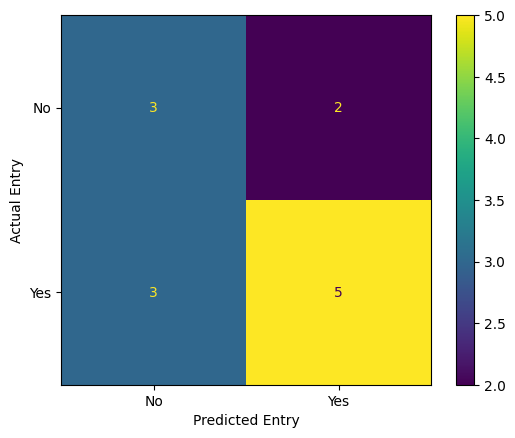

              precision    recall  f1-score   support

           N       0.50      0.60      0.55         5
           Y       0.71      0.62      0.67         8

    accuracy                           0.62        13
   macro avg       0.61      0.61      0.61        13
weighted avg       0.63      0.62      0.62        13



In [69]:
df_teams = pd.read_csv('dataset/processed/teams_test.csv')
df_teams = df_teams.sort_values(by=['franchID', 'year'])
df_teams['playoffNextYear'] = df_teams['playoff'].shift(-1)
df_teams.loc[df_teams['franchID'] != df_teams['franchID'].shift(-1), 'playoffNextYear'] = None
df_teams.dropna(subset=['playoffNextYear'], inplace=True)
#df_teams["confW"] = df_teams["confW"].fillna(0)
#df_teams = df_teams.fillna(-1)

label_encoder = LabelEncoder()
df_teams['playoff'] = label_encoder.fit_transform(df_teams['playoff'])

features = ['won', 'playoff', 'PER', 'Cumulative Win Rate', 'Rookie'] # attend?

df_teams_train = df_teams[df_teams['year'] <= 8]
df_teams_test = df_teams[df_teams['year'].isin([9, 10])]

# df_teams_train = df_teams[df_teams['year'] <= 5]
# df_teams_test = df_teams[df_teams['year'].isin([6])]

training_inputs = df_teams_train[features]
training_classes = df_teams_train['playoffNextYear']
testing_inputs = df_teams_test[features]
testing_classes = df_teams_test['playoffNextYear']

dt_class = DecisionTreeClassifier(random_state=42)
dt_class.fit(training_inputs, training_classes)
# print(training_inputs.isna().sum())
dt_class.predict(testing_inputs)

dt_class.score(testing_inputs, testing_classes)

accuracy_score(testing_classes, dt_class.predict(testing_inputs))

importance = dt_class.feature_importances_
for feature, imp in zip(features, importance):
    print(f"Feature: {feature}, Importance: {imp}")

'''f = open("results.txt", "a")
f.write("Year 9 Accuracy = " + str(accuracy_score(testing_classes, dt_class.predict(testing_inputs))) + "\n")
f.close()'''

data_results(testing_classes, testing_inputs, dt_class)

# plot_tree(dt_class, feature_names=features, filled=True)

Feature: won, Importance: 0.2951004483096765
Feature: playoff, Importance: 0.04898978424579836
Feature: PER, Importance: 0.3688536330811785
Feature: Cumulative Win Rate, Importance: 0.2603034378136169
Feature: Rookie, Importance: 0.026752696549729563


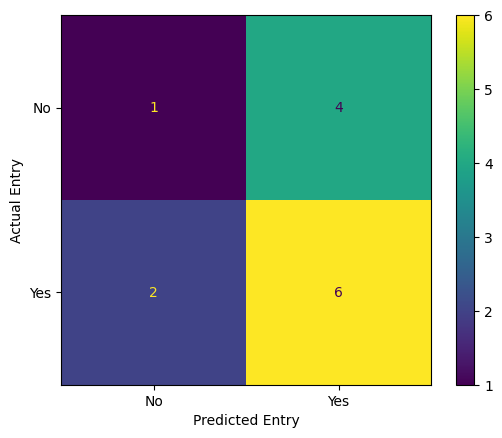

              precision    recall  f1-score   support

           N       0.33      0.20      0.25         5
           Y       0.60      0.75      0.67         8

    accuracy                           0.54        13
   macro avg       0.47      0.47      0.46        13
weighted avg       0.50      0.54      0.51        13



In [70]:
rf_class = RandomForestClassifier(n_estimators=100)
rf_class.fit(training_inputs, training_classes)

# print(rf_class.predict_proba(training_inputs))

importance = rf_class.feature_importances_
for feature, imp in zip(features, importance):
    print(f"Feature: {feature}, Importance: {imp}")

rf_class.score(testing_inputs, testing_classes)

accuracy_score(testing_classes, rf_class.predict(testing_inputs))

data_results(testing_classes, testing_inputs, rf_class)

In [71]:
'''rdg_class = RidgeClassifier()
rdg_class.fit(training_inputs, training_classes)

# print(rdg_class.predict_proba(training_inputs))

rdg_class.score(testing_inputs, testing_classes)

accuracy_score(testing_classes, rdg_class.predict(testing_inputs))

data_results(testing_classes, testing_inputs, rdg_class)'''

'rdg_class = RidgeClassifier()\nrdg_class.fit(training_inputs, training_classes)\n\n# print(rdg_class.predict_proba(training_inputs))\n\nrdg_class.score(testing_inputs, testing_classes)\n\naccuracy_score(testing_classes, rdg_class.predict(testing_inputs))\n\ndata_results(testing_classes, testing_inputs, rdg_class)'

In [72]:
'''nb_class = GaussianNB()
nb_class.fit(training_inputs, training_classes)

nb_class.score(testing_inputs, testing_classes)

accuracy_score(testing_classes, nb_class.predict(testing_inputs))

data_results(testing_classes, testing_inputs, nb_class)'''

'nb_class = GaussianNB()\nnb_class.fit(training_inputs, training_classes)\n\nnb_class.score(testing_inputs, testing_classes)\n\naccuracy_score(testing_classes, nb_class.predict(testing_inputs))\n\ndata_results(testing_classes, testing_inputs, nb_class)'

In [73]:
'''svm_class = SVC(kernel='rbf')
svm_class.fit(training_inputs, training_classes)

svm_class.score(testing_inputs, testing_classes)

accuracy_score(testing_classes, svm_class.predict(testing_inputs))

data_results(testing_classes, testing_inputs, svm_class)'''

"svm_class = SVC(kernel='rbf')\nsvm_class.fit(training_inputs, training_classes)\n\nsvm_class.score(testing_inputs, testing_classes)\n\naccuracy_score(testing_classes, svm_class.predict(testing_inputs))\n\ndata_results(testing_classes, testing_inputs, svm_class)"

In [74]:
'''knn_class = KNeighborsClassifier(n_neighbors=5)
knn_class.fit(training_inputs, training_classes)

knn_class.score(testing_inputs, testing_classes)

accuracy_score(testing_classes, knn_class.predict(testing_inputs))

data_results(testing_classes, testing_inputs, knn_class)'''

'knn_class = KNeighborsClassifier(n_neighbors=5)\nknn_class.fit(training_inputs, training_classes)\n\nknn_class.score(testing_inputs, testing_classes)\n\naccuracy_score(testing_classes, knn_class.predict(testing_inputs))\n\ndata_results(testing_classes, testing_inputs, knn_class)'

In [75]:
'''ann_class = MLPClassifier(random_state=42, max_iter=300)
ann_class.fit(training_inputs, training_classes)

ann_class.score(testing_inputs, testing_classes)

accuracy_score(testing_classes, ann_class.predict(testing_inputs))

data_results(testing_classes, testing_inputs, ann_class)'''

'ann_class = MLPClassifier(random_state=42, max_iter=300)\nann_class.fit(training_inputs, training_classes)\n\nann_class.score(testing_inputs, testing_classes)\n\naccuracy_score(testing_classes, ann_class.predict(testing_inputs))\n\ndata_results(testing_classes, testing_inputs, ann_class)'

In [76]:
'''ab_class = AdaBoostClassifier(n_estimators=100, algorithm="SAMME", random_state=42)
ab_class.fit(training_inputs, training_classes)

ab_class.score(testing_inputs, testing_classes)

accuracy_score(testing_classes, ab_class.predict(testing_inputs))

data_results(testing_classes, testing_inputs, ab_class)'''

'ab_class = AdaBoostClassifier(n_estimators=100, algorithm="SAMME", random_state=42)\nab_class.fit(training_inputs, training_classes)\n\nab_class.score(testing_inputs, testing_classes)\n\naccuracy_score(testing_classes, ab_class.predict(testing_inputs))\n\ndata_results(testing_classes, testing_inputs, ab_class)'

In [77]:
'''for w in df_teams['confW']:
    print(w)
nan_count = df_teams['confW'].isna().sum()
print(nan_count)'''

#print(df_teams.isna().sum())

#df_teams.head(164)

df_teams.head(30)

,year,tmID,franchID,confID,rank,playoff,firstRound,semis,finals,name,...,awayW,awayL,confW,confL,min,PER,coachID,Cumulative Win Rate,Rookie,playoffNextYear
0,9,ATL,ATL,EA,7,0,NaN,NaN,NaN,Atlanta Dream,...,3,14,2,18,6825,3.115444,meadoma99w,NaN,True,Y
2,1,CHA,CHA,EA,8,0,NaN,NaN,NaN,Charlotte Sting,...,3,13,5,16,6475,NaN,dunntr01wc,NaN,True,Y
3,2,CHA,CHA,EA,4,1,W,W,L,Charlotte Sting,...,7,9,15,6,6500,3.104820,donovan99w,0.281250,False,Y
4,3,CHA,CHA,EA,2,1,L,NaN,NaN,Charlotte Sting,...,7,9,12,9,6450,3.302017,donovan99w,0.469375,False,Y
5,4,CHA,CHA,EA,2,1,L,NaN,NaN,Charlotte Sting,...,5,12,12,12,6850,3.166522,laceytr99w,NaN,True,N
6,5,CHA,CHA,EA,5,0,NaN,NaN,NaN,Charlotte Sting,...,6,11,8,12,6900,3.135331,laceytr99w,0.500000,False,N
7,6,CHA,CHA,EA,6,0,NaN,NaN,NaN,Charlotte Sting,...,1,16,4,16,6945,3.210959,boguemu01w,NaN,True,N
9,7,CHI,CHI,EA,7,0,NaN,NaN,NaN,Chicago Sky,...,2,15,4,16,6800,3.045211,cowenda01w,NaN,True,N
10,8,CHI,CHI,EA,6,0,NaN,NaN,NaN,Chicago Sky,...,8,9,6,14,6972,3.075373,overtbo99w,NaN,True,N
11,9,CHI,CHI,EA,5,0,NaN,NaN,NaN,Chicago Sky,...,4,13,10,10,6875,3.102487,keyst99wc,NaN,True,N
